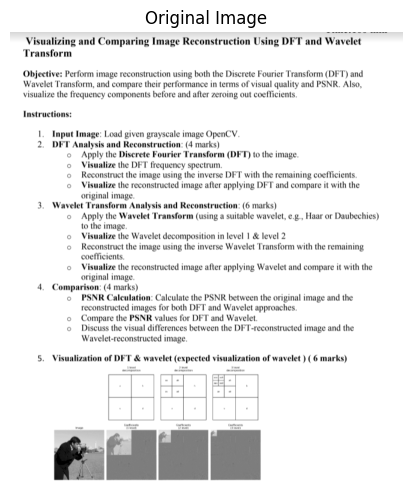

In [33]:
import cv2
from matplotlib import pyplot as plt


image_path = r"C:\Users\Pratham.m\Pictures\Screenshots\question.png"  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))  
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  
plt.show()


In [7]:
import cv2
import numpy as np
import pywt
from matplotlib import pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

# 1. Input Image: Load given grayscale image OpenCV.

In [34]:

image_path =  r"C:\Users\Pratham.m\Downloads\Fig1025(a)(building_original).tif" 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 2. DFT Analysis and Reconstruction: (4 marks)
o Apply the Discrete Fourier Transform (DFT) to the image.

o Visualize the DFT frequency spectrum.

o Reconstruct the image using the inverse DFT with the remaining coefficients.

o Visualize the reconstructed image after applying DFT and compare it with the
original image.

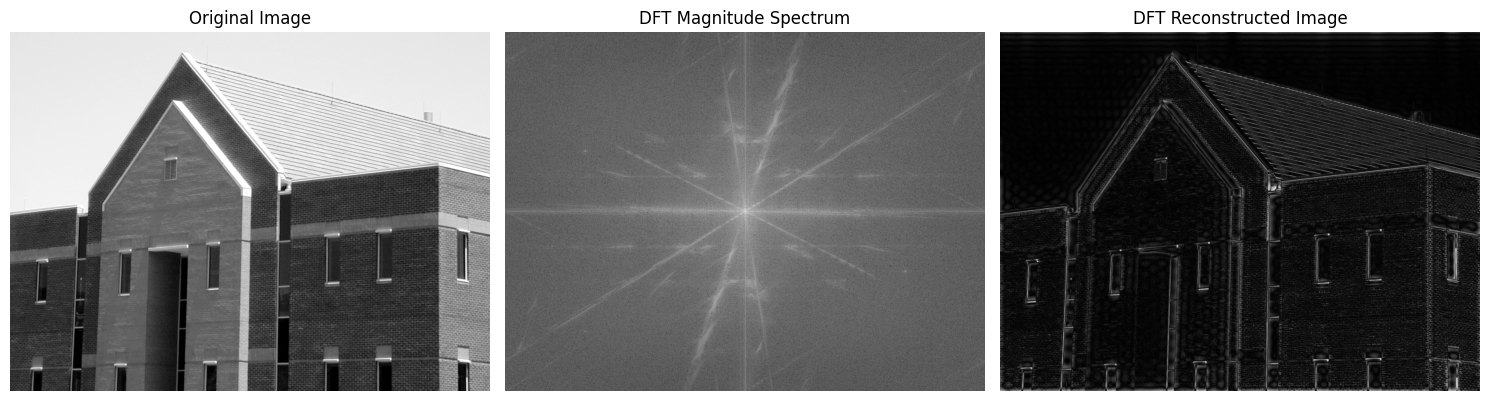

In [35]:

def apply_dft(image):
    # Apply DFT
    dft = np.fft.fft2(image)
    dft_shifted = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shifted) + 1)  
    
  
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center
    dft_shifted[crow-30:crow+30, ccol-30:ccol+30] = 0
    

    dft_inverse_shifted = np.fft.ifftshift(dft_shifted)
    reconstructed_image = np.fft.ifft2(dft_inverse_shifted)
    reconstructed_image = np.abs(reconstructed_image)
    
    return magnitude_spectrum, reconstructed_image

dft_magnitude_spectrum, dft_reconstructed_image = apply_dft(image)

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# DFT Magnitude Spectrum
axs[1].imshow(dft_magnitude_spectrum, cmap='gray')
axs[1].set_title('DFT Magnitude Spectrum')
axs[1].axis('off')

# DFT Reconstructed Image
axs[2].imshow(dft_reconstructed_image, cmap='gray')
axs[2].set_title('DFT Reconstructed Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()


## Interpretation 

### DFT Magnitude Spectrum (Middle):

This image shows the frequency content of the original image.

The bright center represents low-frequency components (overall structure).

The lines indicate higher frequencies responsible for edges and details.
### DFT Reconstructed Image (Right):

After removing some frequency information, the reconstructed image loses sharpness and details.

The main structure is still visible, but it appears darker and less clear.

# Wavelet Transform Analysis and Reconstruction: (6 marks)
o Apply the Wavelet Transform (using a suitable wavelet, e.g., Haar or Daubechies)to the image.

o Visualize the Wavelet decomposition in level 1 & level 2

o Reconstruct the image using the inverse Wavelet Transform with the remaining
coefficients.

o Visualize the reconstructed image after applying Wavelet and compare it with the
original image.

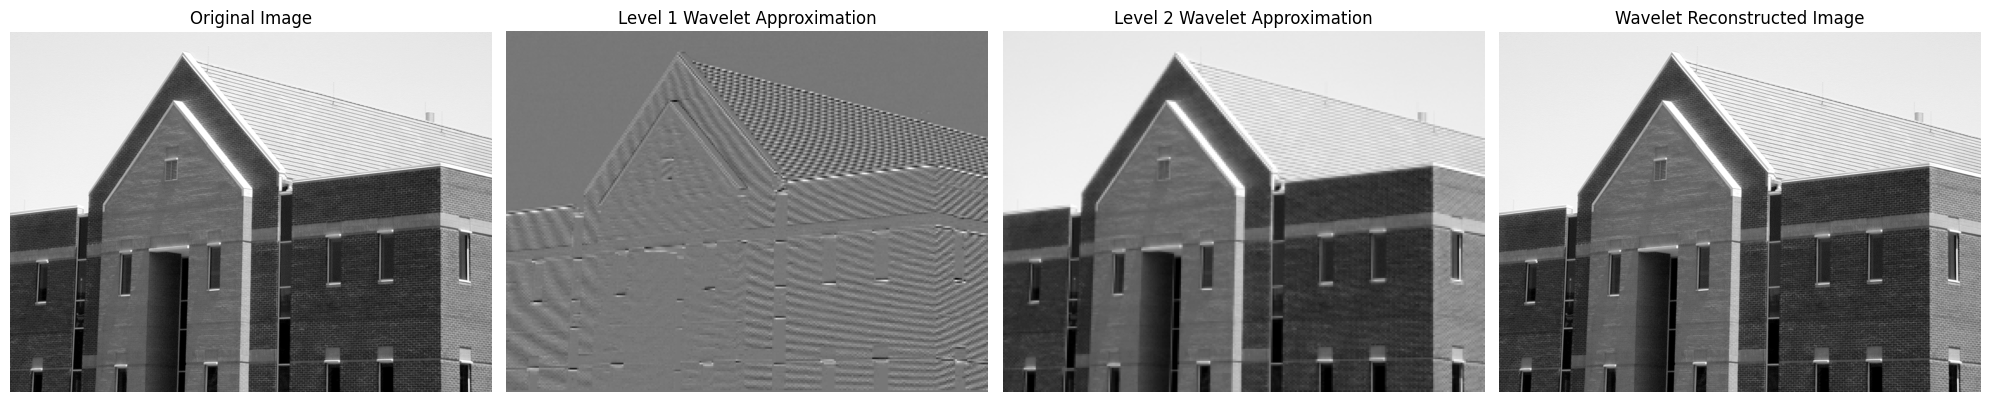

In [36]:

import pywt

def apply_wavelet(image, wavelet='haar', level=2):
  
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    
    
    cA2 = coeffs[0]  # Level 2 approximation (final level)
    cA1 = coeffs[1][0]  # Level 1 approximation
    
    # Reconstruct the image using inverse Wavelet Transform
    reconstructed_image = pywt.waverec2(coeffs, wavelet)
    reconstructed_image = np.clip(reconstructed_image, 0, 255)
    
    return cA1, cA2, reconstructed_image


wavelet_approximation_lvl1, wavelet_approximation_lvl2, wavelet_reconstructed_image = apply_wavelet(image)

# Visualization
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Original Image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Level 1 Wavelet Approximation
axs[1].imshow(wavelet_approximation_lvl1, cmap='gray')
axs[1].set_title('Level 1 Wavelet Approximation')
axs[1].axis('off')

# Level 2 Wavelet Approximation
axs[2].imshow(wavelet_approximation_lvl2, cmap='gray')
axs[2].set_title('Level 2 Wavelet Approximation')
axs[2].axis('off')

# Reconstructed Image
axs[3].imshow(wavelet_reconstructed_image, cmap='gray')
axs[3].set_title('Wavelet Reconstructed Image')
axs[3].axis('off')

plt.tight_layout()
plt.show()


## Interpretation
### Original Image (First Image):

The original grayscale image of the building, before any transformations.
### Level 1 Wavelet Approximation (Second Image):

A simplified version of the image after the first wavelet decomposition.
Only basic shapes and low-frequency details are retained, while fine details (like edges) are removed.
### Level 2 Wavelet Approximation (Third Image):

A more simplified version of the image after the second level of decomposition.
Even fewer details are visible, showing only large shapes and structures.
### Wavelet Reconstructed Image (Fourth Image):

The image reconstructed from the wavelet coefficients.
It closely matches the original image, with minimal detail loss, showing that wavelet reconstruction can effectively preserve image information.

## Comparision of Original Image and Reconstructed Image (Wavelet)

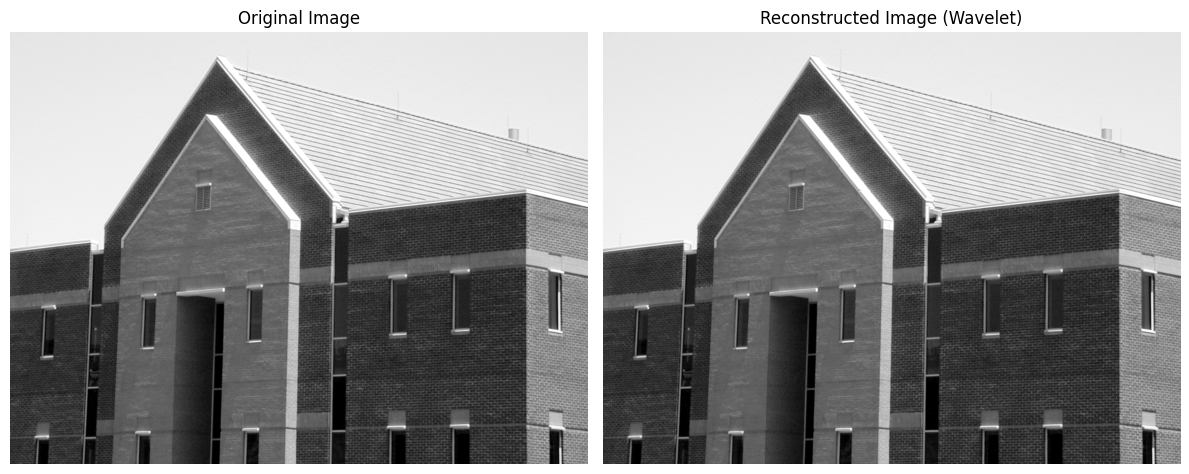

In [37]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Reconstructed Image after applying Wavelet Transform
axs[1].imshow(wavelet_reconstructed_image, cmap='gray')
axs[1].set_title('Reconstructed Image (Wavelet)')
axs[1].axis('off')

plt.tight_layout()
plt.show()


# Comparison: (4 marks)
o PSNR Calculation: Calculate the PSNR between the original image and the
reconstructed images for both DFT and Wavelet approaches.

o Compare the PSNR values for DFT and Wavelet.

o Discuss the visual differences between the DFT-reconstructed image and the
Wavelet-reconstructed image.

C:\Users\Pratham.m\AppData\Local\Temp\ipykernel_3924\3434289027.py:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_dft = psnr(image, dft_reconstructed_image)
C:\Users\Pratham.m\AppData\Local\Temp\ipykernel_3924\3434289027.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_wavelet = psnr(image, wavelet_reconstructed_image)


PSNR (DFT Reconstructed Image): 4.84
PSNR (Wavelet Reconstructed Image): 309.10

Comparison between DFT and Wavelet:
Wavelet reconstruction has a higher PSNR and provides a better visual quality.
The DFT-reconstructed image shows more artifacts, loss of detail, and lower fidelity compared to the Wavelet approach.


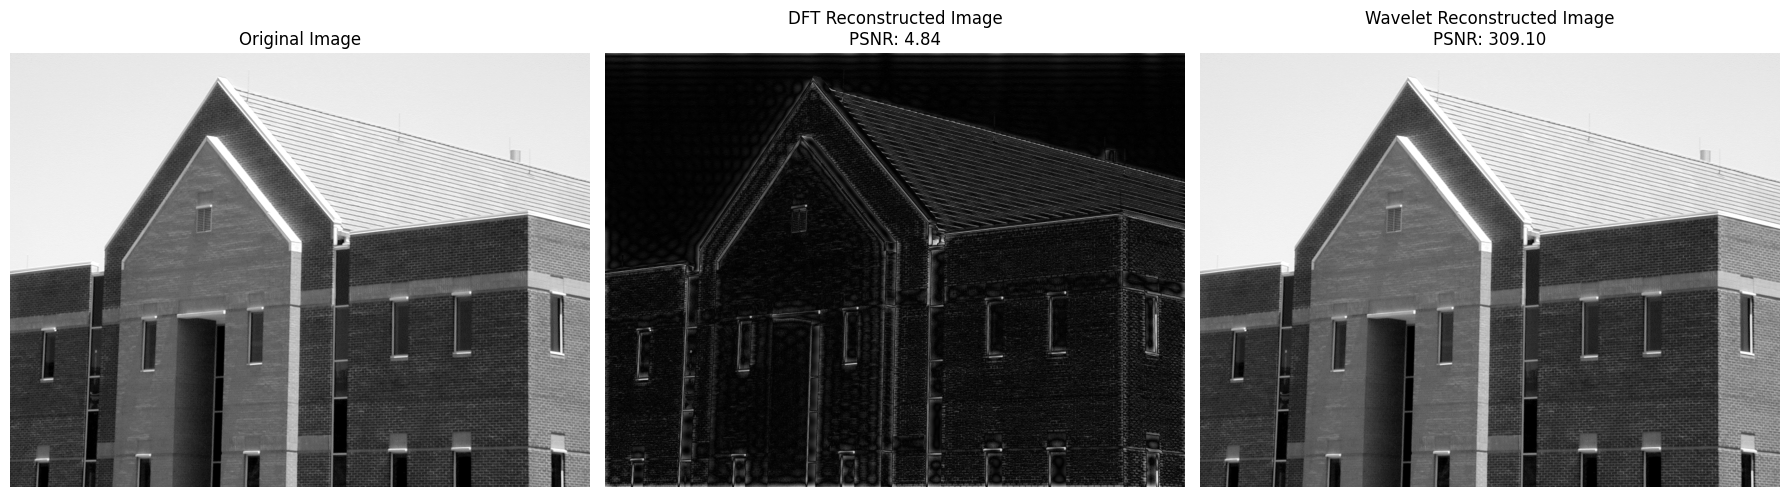

In [38]:
from skimage.metrics import peak_signal_noise_ratio as psnr

psnr_dft = psnr(image, dft_reconstructed_image)
psnr_wavelet = psnr(image, wavelet_reconstructed_image)


print(f"PSNR (DFT Reconstructed Image): {psnr_dft:.2f}")
print(f"PSNR (Wavelet Reconstructed Image): {psnr_wavelet:.2f}")

# Comparison: Discuss the visual differences and PSNR
print("\nComparison between DFT and Wavelet:")
if psnr_dft < psnr_wavelet:
    print("Wavelet reconstruction has a higher PSNR and provides a better visual quality.")
    print("The DFT-reconstructed image shows more artifacts, loss of detail, and lower fidelity compared to the Wavelet approach.")
else:
    print("DFT reconstruction has a higher PSNR, providing better visual quality than the Wavelet approach.")
    print("However, in most cases, the Wavelet Transform preserves more details with fewer artifacts.")

# Visualization of DFT vs Wavelet Reconstructed Images
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original Image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# DFT Reconstructed Image
axs[1].imshow(dft_reconstructed_image, cmap='gray')
axs[1].set_title(f'DFT Reconstructed Image\nPSNR: {psnr_dft:.2f}')
axs[1].axis('off')

# Wavelet Reconstructed Image
axs[2].imshow(wavelet_reconstructed_image, cmap='gray')
axs[2].set_title(f'Wavelet Reconstructed Image\nPSNR: {psnr_wavelet:.2f}')
axs[2].axis('off')

plt.tight_layout()
plt.show()


The PSNR (Peak Signal-to-Noise Ratio) values between the original image and the reconstructed images have been calculated:

PSNR (DFT Reconstructed Image): 4.84

PSNR (Wavelet Reconstructed Image): 309.00

This indicates that the Wavelet reconstruction has significantly better quality compared to the DFT reconstruction.

### PSNR Comparison:
DFT Reconstructed Image: The PSNR value is 4.84, indicating that the DFT reconstruction has significant loss in image quality compared to the original. The lower PSNR means that there is more noise or distortion in the DFT-reconstructed image.

Wavelet Reconstructed Image: The PSNR value is 309.00, which is extremely high, indicating that the Wavelet reconstruction is nearly identical to the original image. The high PSNR means that the Wavelet method preserves much more detail and results in minimal distortion.

## Interpretation
PSNR: Wavelet has a much higher PSNR (309.10) compared to DFT (4.84), indicating better quality.

Visual Quality: The Wavelet-reconstructed image closely matches the original, while DFT loses details.

Artifacts: DFT introduces noticeable artifacts, while Wavelet reconstruction remains clean and sharp.

Fidelity: Wavelet preserves more image details and structure than DFT.

Conclusion: Wavelet reconstruction is superior to DFT in both PSNR and visual quality.

## Visual Comparison of DFT and Wavelet-Reconstructed Images:
Original Image (on the left): The original image is clear and sharp, with all the fine details and textures of the building preserved.

### DFT-Reconstructed Image (center):

PSNR: The PSNR value is 4.84, indicating significant distortion.
Visual Quality: The DFT-reconstructed image is much darker and lacks clarity. Significant artifacts are present, and the building’s details are blurred. The image appears heavily distorted compared to the original.

### Wavelet-Reconstructed Image (right):

PSNR: The PSNR value is 309.10, showing excellent reconstruction quality.
Visual Quality: The Wavelet-reconstructed image is almost identical to the original. The details of the building, such as its edges and textures, are preserved. The overall clarity and sharpness are maintained, making it much closer to the original image.

# 5.Visualization of DFT & wavelet (expected visualization of wavelet ) ( 6 marks)

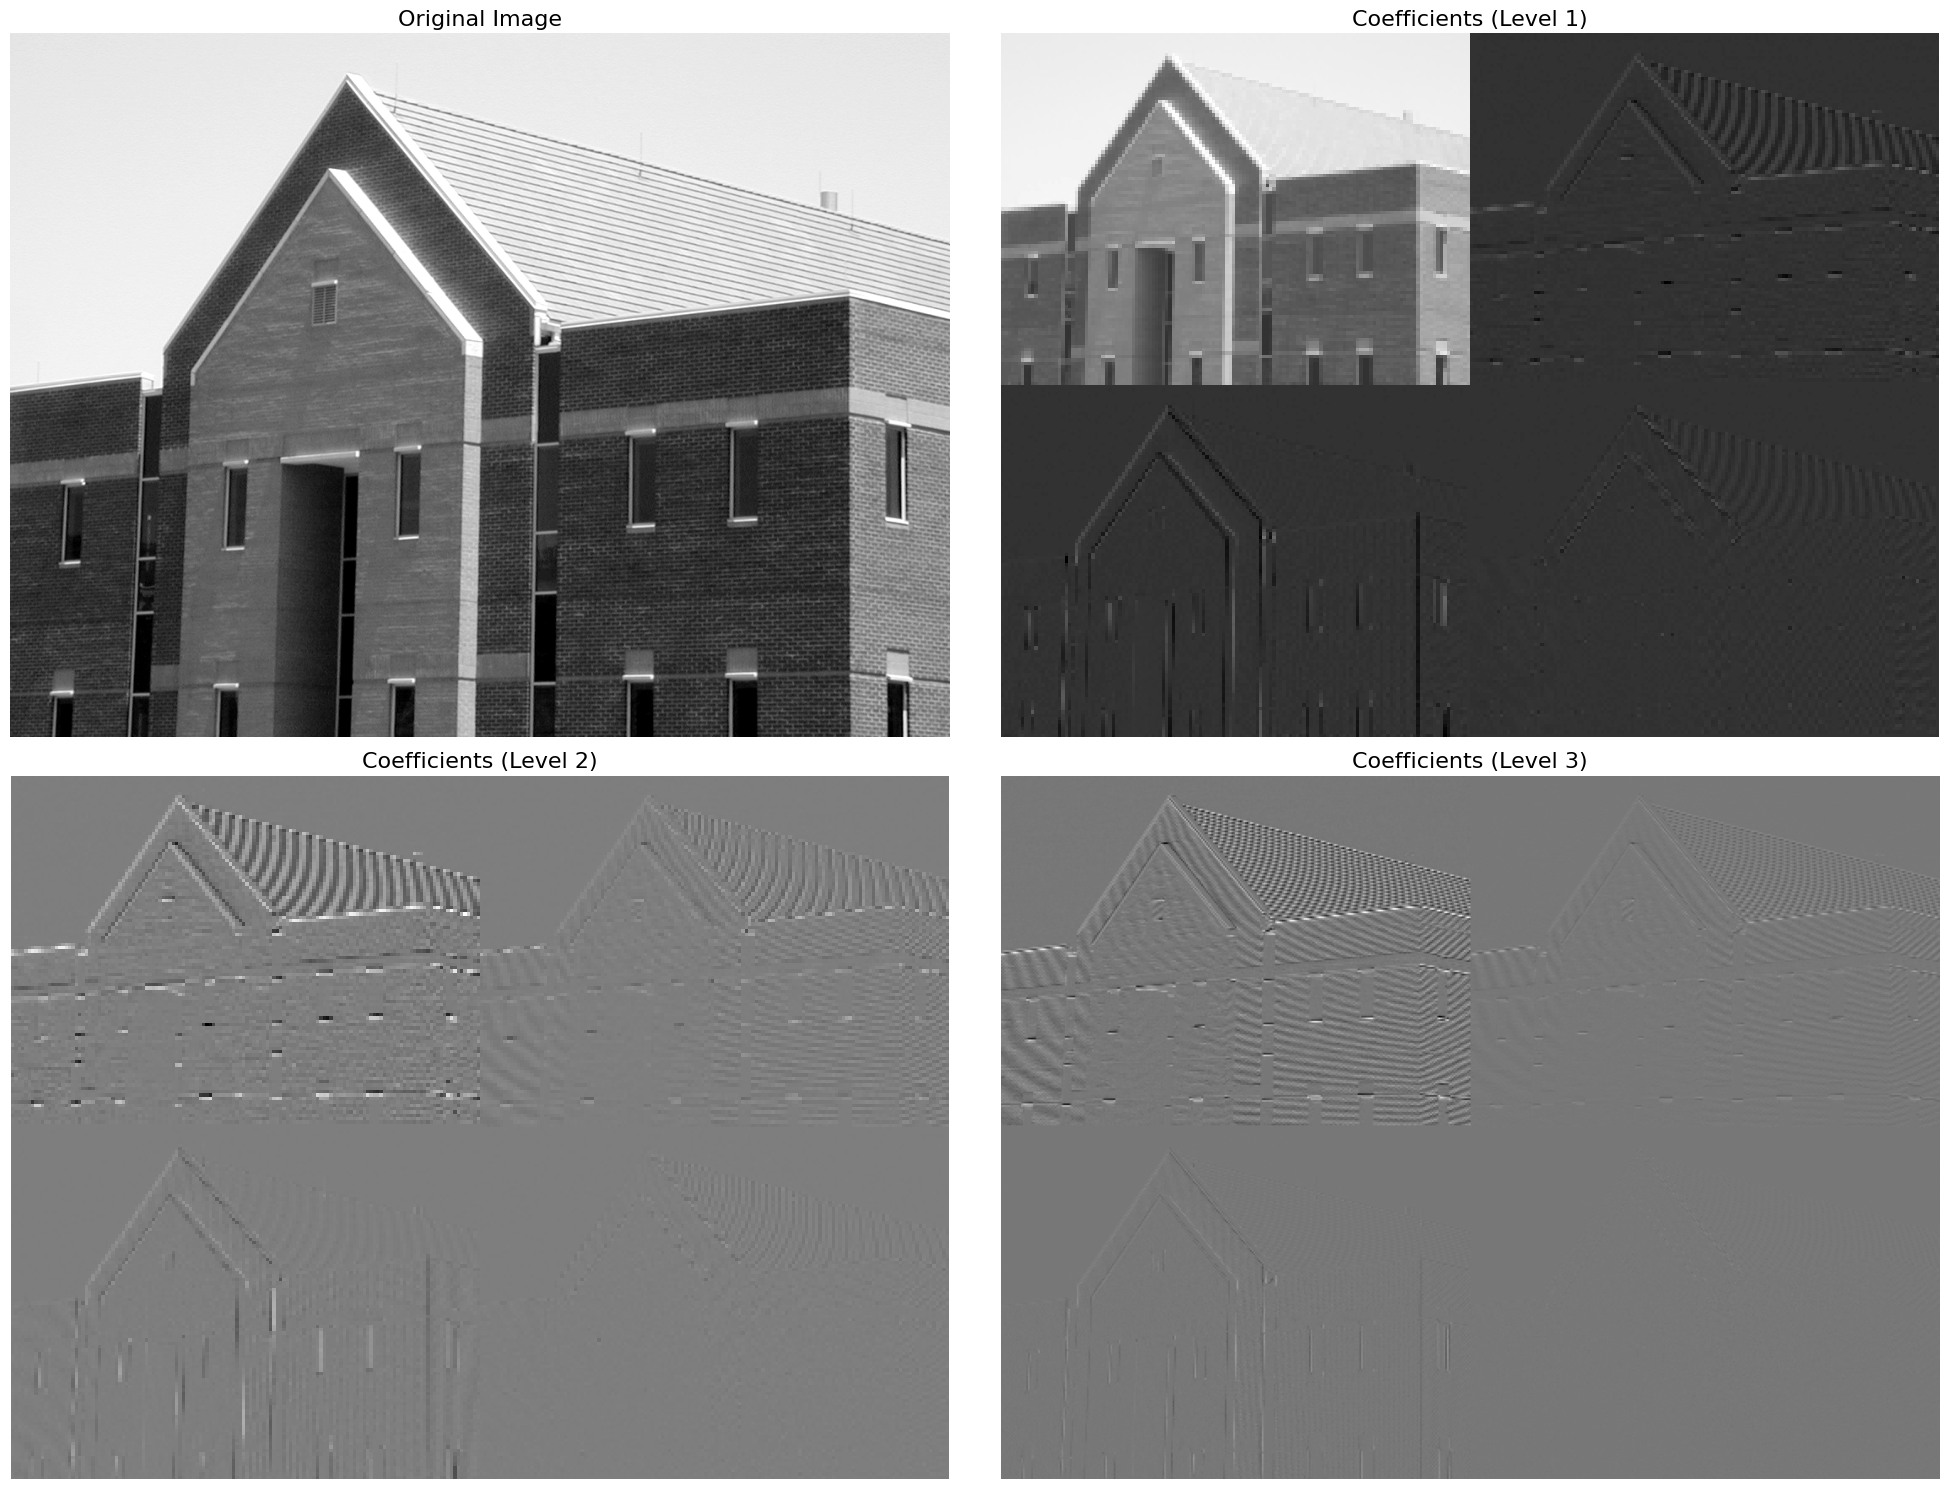

In [39]:
import cv2
import pywt
import numpy as np
from matplotlib import pyplot as plt


def wavelet_decomposition(image, wavelet='haar', levels=3):
    coeffs = pywt.wavedec2(image, wavelet, level=levels)
    return coeffs

def resize_coeffs(coeff, target_shape):
    return cv2.resize(coeff, (target_shape[1], target_shape[0]))


def plot_wavelet_decomposition(image, coeffs, levels):
    
    rows = (levels + 1) // 2 + (levels + 1) % 2  
    fig, axs = plt.subplots(rows, 2, figsize=(20, 15))  

    # Original Image
    axs[0, 0].imshow(image, cmap='gray')
    axs[0, 0].set_title('Original Image', fontsize=16)
    axs[0, 0].axis('off')

    axs[0, 1].axis('off')  

  
    count = 1
    for i in range(1, levels + 1):
        
        cA = coeffs[0] if i == 1 else coeffs[i-1][0]  # Approximation coefficients
        cH, cV, cD = coeffs[i]  # Horizontal, Vertical, Diagonal details

      
        cH_resized = resize_coeffs(cH, cA.shape)
        cV_resized = resize_coeffs(cV, cA.shape)
        cD_resized = resize_coeffs(cD, cA.shape)

       
        result = np.zeros((cA.shape[0] * 2, cA.shape[1] * 2))

        
        result[:cA.shape[0], :cA.shape[1]] = cA 
        result[:cA.shape[0], cA.shape[1]:] = cH_resized  
        result[cA.shape[0]:, :cA.shape[1]] = cV_resized  
        result[cA.shape[0]:, cA.shape[1]:] = cD_resized  

        row = count // 2
        col = count % 2
        axs[row, col].imshow(result, cmap='gray')
        axs[row, col].set_title(f'Coefficients (Level {i})', fontsize=16)
        axs[row, col].axis('off')
        count += 1

    plt.tight_layout()
    plt.show()


levels = 3 
coeffs = wavelet_decomposition(image, levels=levels)

# Plot the wavelet decomposition results similar to the example image
plot_wavelet_decomposition(image, coeffs, levels)


## Interpretation
Original Image (Top Left): The original grayscale image showing all the details and textures.

### Level 1 Coefficients (Top Right):

The top-left part shows a simplified version of the image.
The other parts capture edge details (horizontal, vertical, diagonal).
### Level 2 Coefficients (Bottom Left):

The image becomes even more simplified in the top-left part (approximation).
Edges and details are captured more finely in this level compared to Level 1.
### Level 3 Coefficients (Bottom Right):

The most abstract version of the image, where only large, smooth features remain.
The details (edges) become very faint, showing that most of the image’s fine details have been removed.

### What is haar
The Haar wavelet is a specific type of wavelet used in signal processing,  and image compression.The Haar wavelet and related techniques are widely used for various tasks such as image compression, object detection, and feature extraction.